<a href="https://colab.research.google.com/github/medo962006/CS-club-Machine-Learning/blob/main/PrincipalComponentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

file_path = 'heart_disease_uci.csv'
df = pd.read_csv(file_path)
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        958 non-null    int64  
 1   age       958 non-null    int64  
 2   gender    958 non-null    object 
 3   dataset   958 non-null    object 
 4   cp        958 non-null    object 
 5   trestbps  890 non-null    float64
 6   chol      925 non-null    float64
 7   fbs       868 non-null    object 
 8   restecg   956 non-null    object 
 9   thalch    894 non-null    float64
 10  exang     894 non-null    object 
 11  oldpeak   887 non-null    float64
 12  slope     626 non-null    object 
 13  ca        309 non-null    float64
 14  thal      445 non-null    object 
 15  num       958 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 119.9+ KB


(   id  age  gender    dataset               cp  trestbps   chol    fbs  \
 0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
 1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
 2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
 3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
 4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   
 
           restecg  thalch  exang  oldpeak        slope   ca  \
 0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
 1  lv hypertrophy   108.0   True      1.5         flat  3.0   
 2  lv hypertrophy   129.0   True      2.6         flat  2.0   
 3          normal   187.0  False      3.5  downsloping  0.0   
 4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   
 
                 thal  num  
 0       fixed defect    0  
 1             normal    2  
 2  reversable defect    1  
 3             normal    0  
 4             no

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())
label_encoders = {}
categorical_columns = ['gender', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
scaler = StandardScaler()
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

<ipython-input-4-22617971d3e3>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


,id,age,gender,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,0.984662,1,0,3,0.699046,0.289732,1,0,0.511095,0,1.381447,0,-0.353246,0,0
1,2,1.409670,1,0,0,1.513484,0.781996,0,0,-1.161897,1,0.619160,1,4.504305,1,2
2,3,1.409670,1,0,0,-0.658352,0.252579,0,0,-0.325401,1,1.667305,1,2.885122,2,1
3,4,-1.777892,1,0,2,-0.115393,0.447628,0,1,1.984921,0,2.524878,0,-0.353246,1,0
4,5,-1.352884,0,0,1,-0.115393,0.020379,0,0,1.387424,0,0.523874,2,-0.353246,1,0


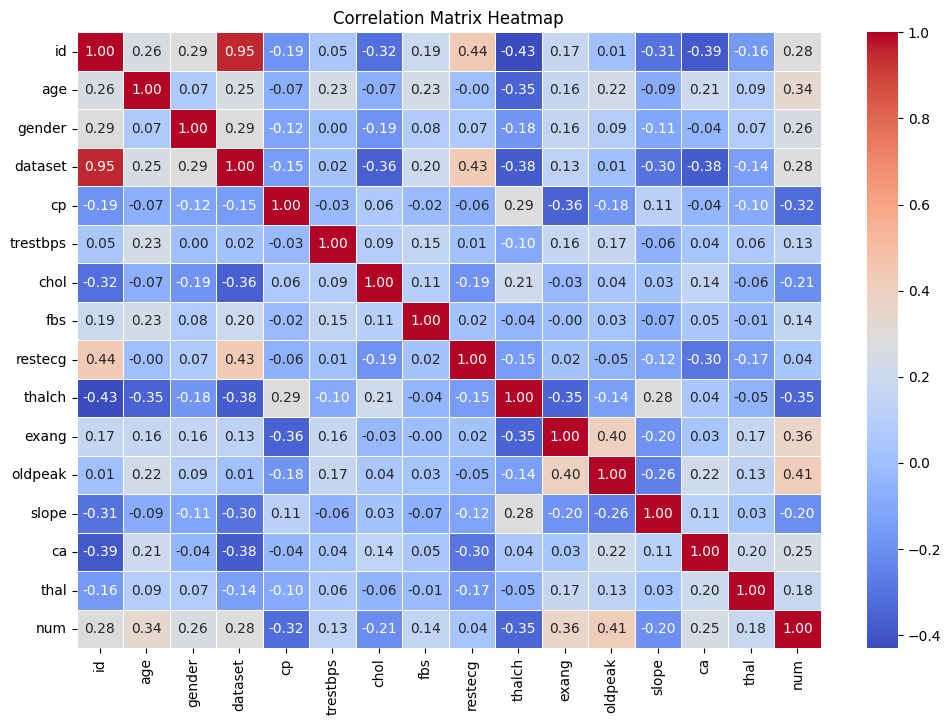

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principal_components = pca.fit_transform(df.drop(columns=['id', 'num']))
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(5)])
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()
